# Open Food Facts dataset - Dark Chocolate Analysis 

### Load the Dataset

In [1]:
import pandas as pd
# Load the Open Food Facts dataset from a TSV file
df_food = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')

<ipython-input-1-6b639f1198e9>:3: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')


In [2]:
# Display the first few rows of the DataFrame
df_food.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get all the columns in the DataFrame
all_columns = df_food.columns

# Print the list of columns
print("All columns:")
for column in all_columns:
    print(column)

All columns:
code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-f

In [4]:
# Fill missing values in 'product_name' column with empty string
df_food['product_name'].fillna('', inplace=True)

In [5]:
# Select specific columns of interest
columns = ['product_name','generic_name','quantity','packaging','brands','categories_en','countries_en','ingredients_text','traces','additives','main_category_en','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','cocoa_100g','trans-fat_100g','manufacturing_places','image_small_url']

### Filter the DataFrame to include only dark chocolate products

In [6]:
# Filter the DataFrame to include only dark chocolate products
df_dark = df_food[df_food['categories_en'].str.contains('dark chocolate', case=False, na=False)][columns]

# Display summary statistics of the DataFrame
df_dark.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,cocoa_100g,trans-fat_100g
count,1209.000000,1166.000000,1168.000000,1165.000000,1166.000000,791.000000,1209.000000,1160.000000,811.000000,44.000000
mean,2248.305633,36.229005,20.964058,43.655777,34.805033,8.579769,7.168814,0.095288,63.154871,0.026205
std,239.879508,8.448200,5.796077,12.546421,13.477192,4.484746,2.082578,0.186664,12.699222,0.079105
min,2.000000,1.100000,0.005200,0.800000,0.000000,0.000000,0.500000,0.000000,35.000000,0.000000
25%,2155.400000,31.225000,17.000000,34.100000,27.000000,6.000000,5.800000,0.010000,52.000000,0.000000
50%,2263.000000,36.000000,20.900000,44.000000,36.000000,8.300000,7.000000,0.025400,63.000000,0.000000
75%,2365.000000,41.775000,25.000000,51.500000,45.575000,11.000000,8.500000,0.081182,71.950000,0.000000
max,5870.000000,92.800000,40.000000,147.000000,71.800000,34.800000,14.400000,2.540000,100.000000,0.333000


### Distribution of Dark Chocolate Categories

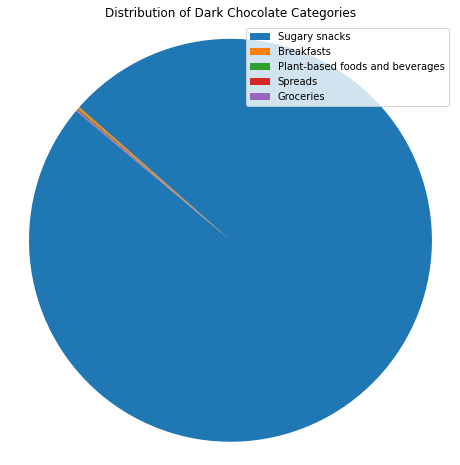

In [7]:
import matplotlib.pyplot as plt

# Filter out rows with missing 'main_category_en' values
filtered_df = df_dark.dropna(subset=['main_category_en'])

# Count occurrences of each category
category_counts = filtered_df['main_category_en'].value_counts()

# Plotting the pie chart without labels
plt.figure(figsize=(8, 8))
plt.pie(category_counts, autopct='', startangle=140)
plt.title('Distribution of Dark Chocolate Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend
plt.legend(category_counts.index, loc='best')

plt.show()

###  Histogram of Cocoa Percentages in Dark Chocolate

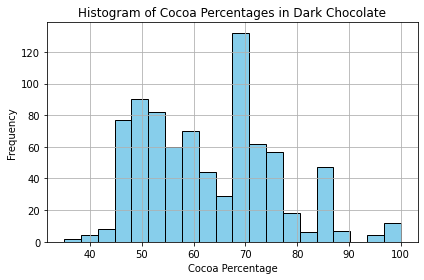

In [8]:
# Create a histogram to visualize the distribution of cocoa percentages in the dataset.
#plt.figure(figsize=(10, 6))
plt.hist(df_dark['cocoa_100g'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Cocoa Percentages in Dark Chocolate')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


### Filter out rows with cocoa percentage less than 50%

In [9]:
# Filter out rows with cocoa percentage less than 50%
df_dark = df_dark[df_dark['cocoa_100g'] >= 50.0]
# Display summary statistics of the filtered DataFrame
df_dark.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,cocoa_100g,trans-fat_100g
count,638.000000,619.000000,617.000000,618.000000,618.000000,405.000000,637.000000,615.000000,693.000000,14.000000
mean,2297.587273,39.517270,23.423817,38.281392,30.798333,10.155961,7.756509,0.050524,66.006349,0.021429
std,203.604883,6.690392,4.783030,10.544124,12.945463,4.252295,2.049146,0.144945,11.485054,0.057893
min,2.000000,13.600000,6.400000,0.800000,0.000000,0.000000,0.500000,0.000000,50.000000,0.000000
25%,2215.750000,35.000000,20.000000,32.000000,25.900000,8.200000,6.400000,0.010000,55.000000,0.000000
50%,2312.500000,39.400000,23.200000,38.000000,31.000000,9.700000,7.700000,0.020000,66.000000,0.000000
75%,2402.000000,43.200000,26.800000,46.875000,40.000000,12.000000,9.000000,0.030000,72.000000,0.000000
max,2750.000000,60.000000,40.000000,72.900000,71.800000,24.000000,14.000000,2.540000,100.000000,0.200000


### Top 10 Dark Chocolate brands in the dataset

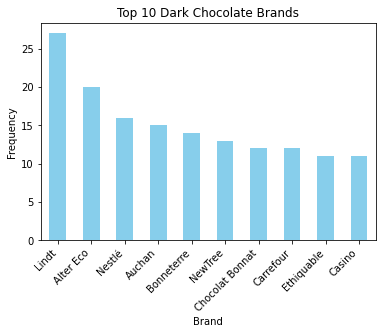

In [10]:
# Group the dataset by brand and count the occurrences of each brand
brand_counts = df_dark['brands'].value_counts()

top_n = 10
top_brands = brand_counts.head(top_n)

# Plot the distribution of dark chocolate brands as a bar chart
#plt.figure(figsize=(8, 15))
top_brands.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Dark Chocolate Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()

### Distribution of Dark Chocolate Products Sold in each Country

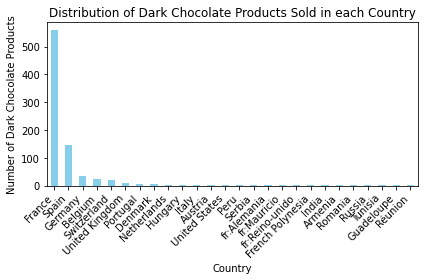

In [11]:
# Count rows for each country where dark chocolate products are sold
split_df = df_dark.assign(countries_en=df_dark['countries_en'].str.split(','))
exploded_df = split_df.explode('countries_en')
country_counts = exploded_df['countries_en'].value_counts()

# Plot the distribution of dark chocolate products by country
#plt.figure(figsize=(15, 8))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dark Chocolate Products Sold in each Country')
plt.xlabel('Country')
plt.ylabel('Number of Dark Chocolate Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Top 10 Dark Chocolate Manufacturing Places  

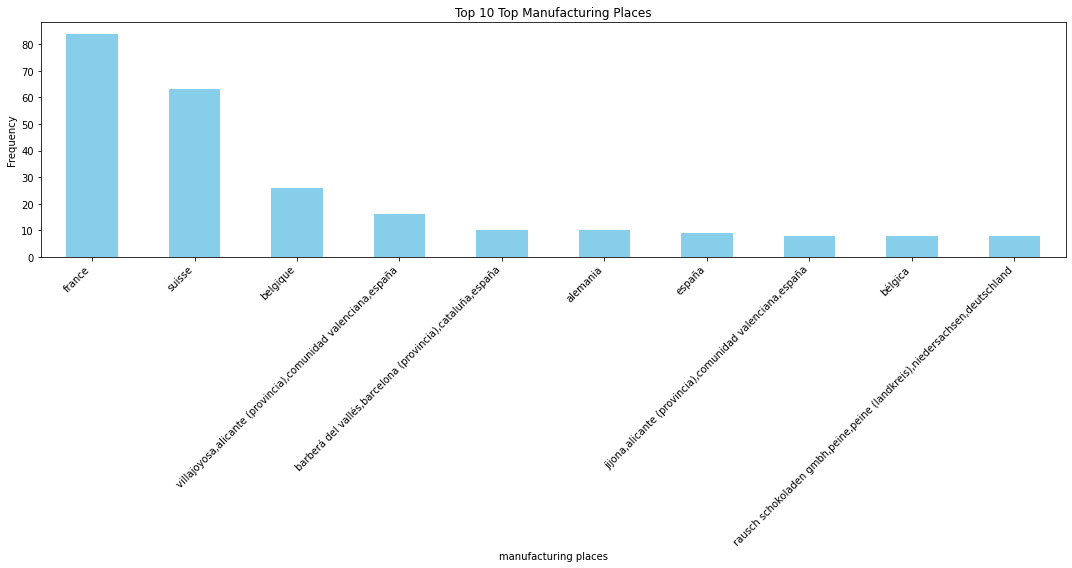

In [12]:
# Group the dataset by brand and count the occurrences of each brand
df_dark['manufacturing_places'] = df_dark['manufacturing_places'].str.lower()
manufacturing_places = df_dark['manufacturing_places'].value_counts()

top_n = 10
top_manufacturing_places = manufacturing_places.head(top_n)

# Plot the distribution of dark chocolate brands as a bar chart
plt.figure(figsize=(15, 8))
top_manufacturing_places.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Top Manufacturing Places')
plt.xlabel('manufacturing places')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 5 brands in top 10 Countries 

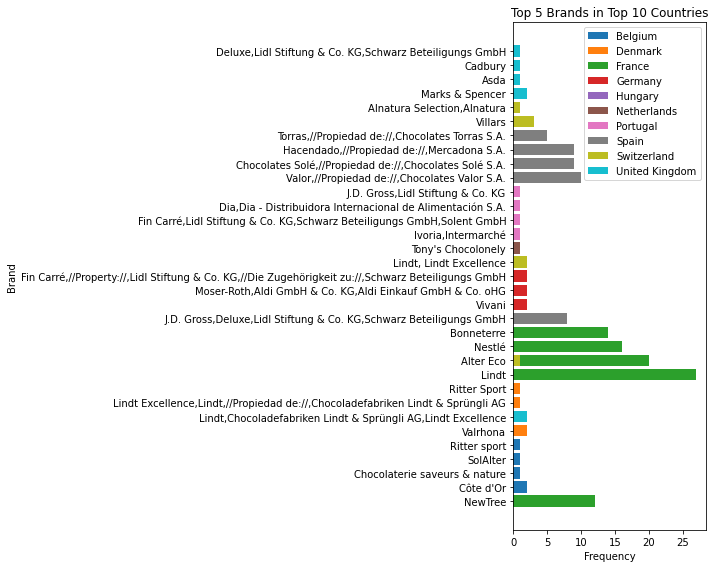

In [13]:
# Get the top 10 countries
top_10_countries = country_counts.head(10).index

split_df = df_dark.assign(countries_en=df_dark['countries_en'].str.split(','))
exploded_df = split_df.explode('countries_en')
brands_by_country = exploded_df.groupby(['countries_en', 'brands']).size().reset_index(name='count')
# Sort brands_by_country by count in descending order
brands_by_country_sorted = brands_by_country.sort_values(by='count', ascending=False)

# Sort the DataFrame by count in descending order
brands_by_country_sorted = brands_by_country.sort_values(by='count', ascending=False)

# Filter brands_by_country_sorted to include only the top 10 countries
top_10_brands_by_country = brands_by_country_sorted[brands_by_country_sorted['countries_en'].isin(top_10_countries)]

# Initialize an empty list to store top 5 brands for each country
top_5_brands_by_country = []

# Iterate over each country in the top 10 countries
for country in top_10_countries:
    # Filter data for the current country
    country_data = top_10_brands_by_country[top_10_brands_by_country['countries_en'] == country]
    # Get the top 5 brands for the current country
    top_5_brands = country_data.head(5)
    # Append to the list
    top_5_brands_by_country.append(top_5_brands)

# Concatenate the dataframes in the list to create a single dataframe
top_5_brands_by_country = pd.concat(top_5_brands_by_country)

# Plot the distribution of top 5 brands by country as a horizontal bar chart
plt.figure(figsize=(10, 8))
for country, data in top_5_brands_by_country.groupby('countries_en'):
    plt.barh(data['brands'], data['count'], label=country)

plt.xlabel('Frequency')
plt.ylabel('Brand')
plt.title('Top 5 Brands in Top 10 Countries')
plt.legend()
plt.tight_layout()
plt.show()



###  Distribution of Dark Chocolate Packaging Types

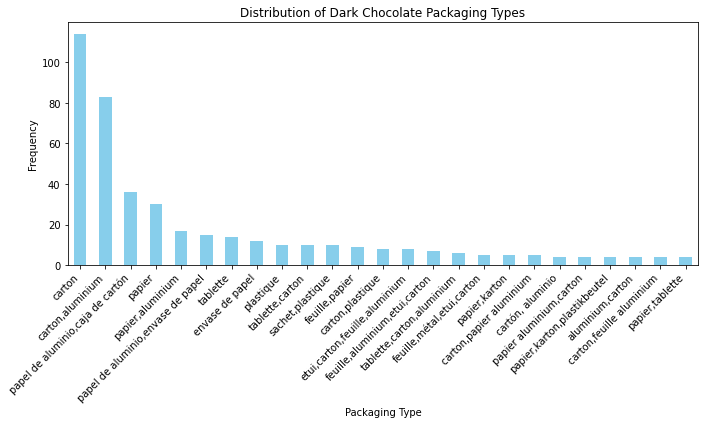

In [14]:
df_dark['packaging'] = df_dark['packaging'].str.lower()
packaging_counts = df_dark['packaging'].value_counts().head(25)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
packaging_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dark Chocolate Packaging Types')
plt.xlabel('Packaging Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Word cloud of common ingredients 

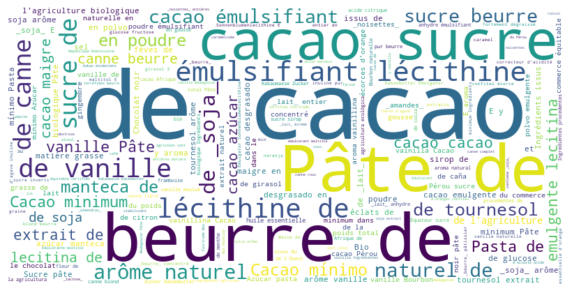

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all ingredients into a single string
ingredients_text = ' '.join(df_dark['ingredients_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

# Display word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
nutritional_columns = ['energy_100g','fat_100g', 'saturated-fat_100g','carbohydrates_100g','sugars_100g', 'proteins_100g', 'salt_100g','fiber_100g']

# Group the DataFrame by 'cocoa_100g' and calculate the mean for each nutritional component
grouped_data_mean = df_dark.groupby('cocoa_100g')[nutritional_columns].mean()

# Group the DataFrame by 'cocoa_100g' and calculate the median for each nutritional component
grouped_data_median = df_dark.groupby('cocoa_100g')[nutritional_columns].median()

### Nutritional Content vs Cocoa Percentage

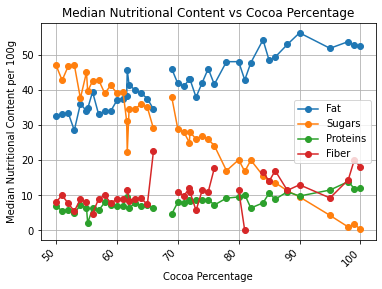

In [17]:
# Plot
#plt.figure(figsize=(14, 8))
plt.plot(grouped_data_median.index, grouped_data_median['fat_100g'], label='Fat', marker='o')
plt.plot(grouped_data_median.index, grouped_data_median['sugars_100g'], label='Sugars', marker='o')
plt.plot(grouped_data_median.index, grouped_data_median['proteins_100g'], label='Proteins', marker='o')
plt.plot(grouped_data_median.index, grouped_data_median['fiber_100g'], label='Fiber', marker='o')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Median Nutritional Content per 100g')
plt.title('Median Nutritional Content vs Cocoa Percentage')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
#plt.tight_layout()
plt.show()


### Box Plot of Nutritional Content 

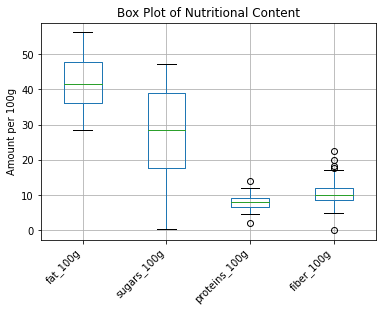

In [18]:
# Box plot of Nutritional Content
grouped_data_median.boxplot(column=['fat_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g'])
plt.title('Box Plot of Nutritional Content')
plt.ylabel('Amount per 100g')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


### Box plot of nutritional content for each cocoa category

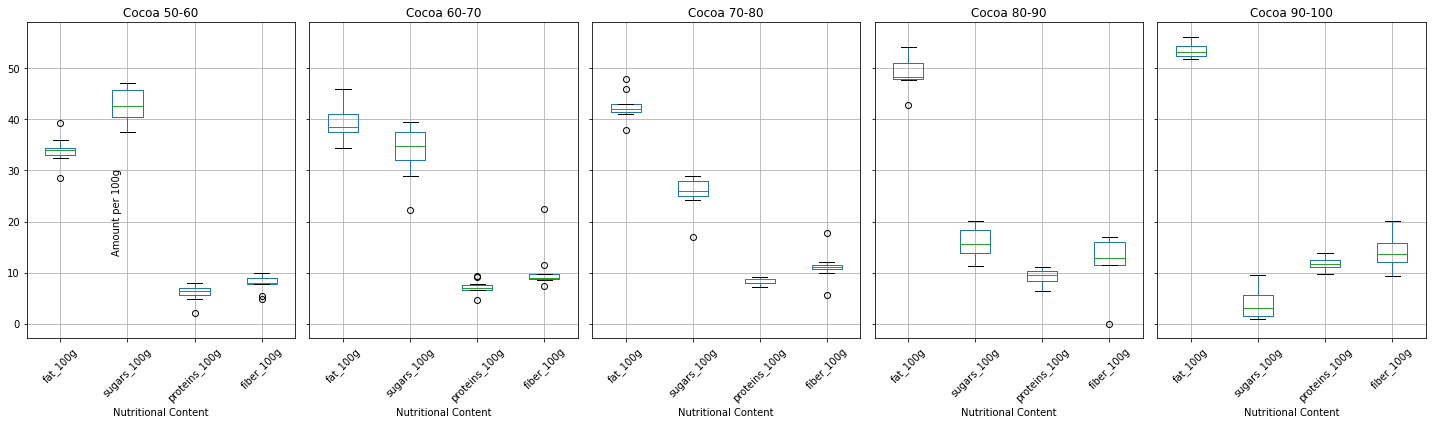

In [19]:
# Box plot of nutritional content for each cocoa category:
# Define cocoa ranges
cocoa_ranges = [(50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=len(cocoa_ranges), figsize=(20, 6), sharey=True)

# Iterate over cocoa ranges
for i, (cocoa_min, cocoa_max) in enumerate(cocoa_ranges):
    # Filter dataframe for the current cocoa range
    subset_indices = grouped_data_median.index[(grouped_data_median.index >= cocoa_min) & 
                                               (grouped_data_median.index < cocoa_max)]
    subset = grouped_data_median.loc[subset_indices]
    
    # Create box plot
    subset.boxplot(column=['fat_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g'], ax=axs[i])
    
    # Set title
    axs[i].set_title(f'Cocoa {cocoa_min}-{cocoa_max}')
    
    # Set x-axis label
    axs[i].set_xlabel('Nutritional Content')
    
    # Rotate x-axis labels
    axs[i].tick_params(axis='x', rotation=45)

# Set common y-axis label
fig.text(0.08, 0.5, 'Amount per 100g', va='center', rotation='vertical')

# Show plot
plt.tight_layout()
plt.show()


### Correlation Heatmap of Nutritional Components 

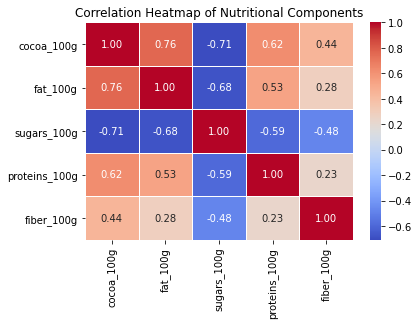

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting nutritional components
nutritional_components = df_dark[['cocoa_100g','fat_100g', 'sugars_100g', 'proteins_100g', 'fiber_100g']]

# Calculate correlation matrix
correlation_matrix = nutritional_components.corr()

# Create heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Nutritional Components')
plt.show()


### Energy content for each cocoa category 

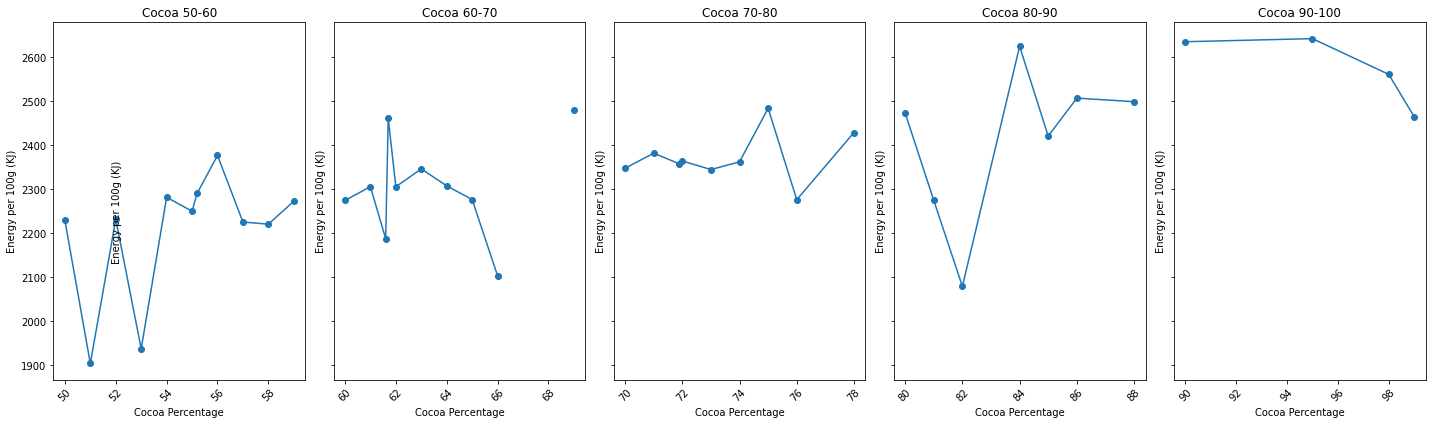

In [21]:
# Define cocoa ranges
cocoa_ranges = [(50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=len(cocoa_ranges), figsize=(20, 6), sharey=True)

# Iterate over cocoa ranges
for i, (cocoa_min, cocoa_max) in enumerate(cocoa_ranges):
    # Filter dataframe for the current cocoa range
    subset_indices = grouped_data_median.index[(grouped_data_median.index >= cocoa_min) & 
                                               (grouped_data_median.index < cocoa_max)]
    subset = grouped_data_median.loc[subset_indices]
    
    # Plot energy content
    axs[i].plot(subset.index, subset['energy_100g'], marker='o')
    
    # Set title
    axs[i].set_title(f'Cocoa {cocoa_min}-{cocoa_max}')
    
    # Set x-axis label
    axs[i].set_xlabel('Cocoa Percentage')
    
    # Set y-axis label
    axs[i].set_ylabel('Energy per 100g (KJ)')
    
    # Rotate x-axis labels
    axs[i].tick_params(axis='x', rotation=45)

# Set common y-axis label
fig.text(0.08, 0.5, 'Energy per 100g (KJ)', va='center', rotation='vertical')

# Show plot
plt.tight_layout()
plt.show()


### Milk-free dark chocolate options 

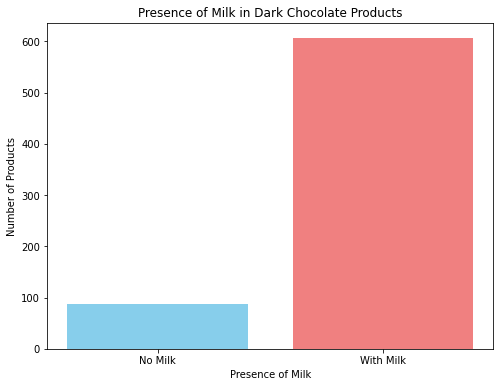

In [22]:
# Milk free dark chocolate options
df_dark_no_milk = df_dark[~(((df_dark['ingredients_text']
                              .str.contains('lait|milk|leche|Milch|latte|leite|melk', case=False, na=False) 
                              | df_dark['traces'].str.contains('lait|milk|leche|Milch|latte|leite|melk', case=False, na=False))
                             & (df_dark['ingredients_text'].notna() & df_dark['traces'].notna()))
                            | (df_dark['ingredients_text'].isna() & df_dark['traces'].isna()))]

# Count the number of products without milk ingredients or traces
no_milk_counts = df_dark_no_milk.shape[0]

# Count the number of products with milk ingredients or traces
with_milk_counts = df_dark.shape[0] - no_milk_counts

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['No Milk', 'With Milk'], [no_milk_counts, with_milk_counts], color=['skyblue', 'lightcoral'])
plt.title('Presence of Milk in Dark Chocolate Products')
plt.xlabel('Presence of Milk')
plt.ylabel('Number of Products')
plt.show()


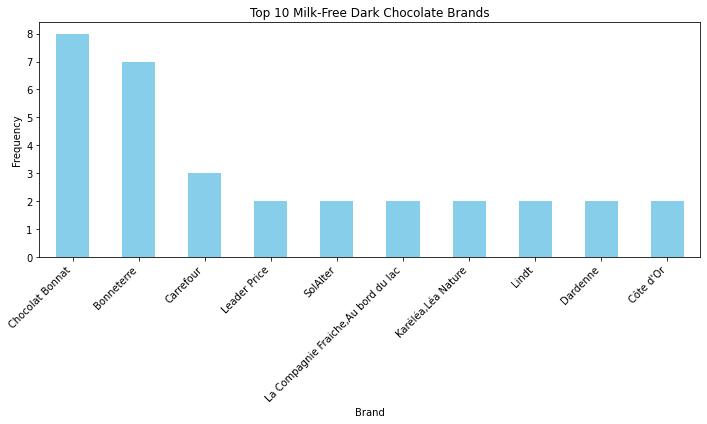

In [23]:
# Count occurrences of each brand
brand_counts = df_dark_no_milk['brands'].value_counts()

# Select the top 10 milk-free brands
top_10_milk_free_brands = brand_counts.head(10)

# Plot the distribution of top 10 milk-free brands as a bar chart
plt.figure(figsize=(10, 6))
top_10_milk_free_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Milk-Free Dark Chocolate Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Organic Dark Chocolate brands

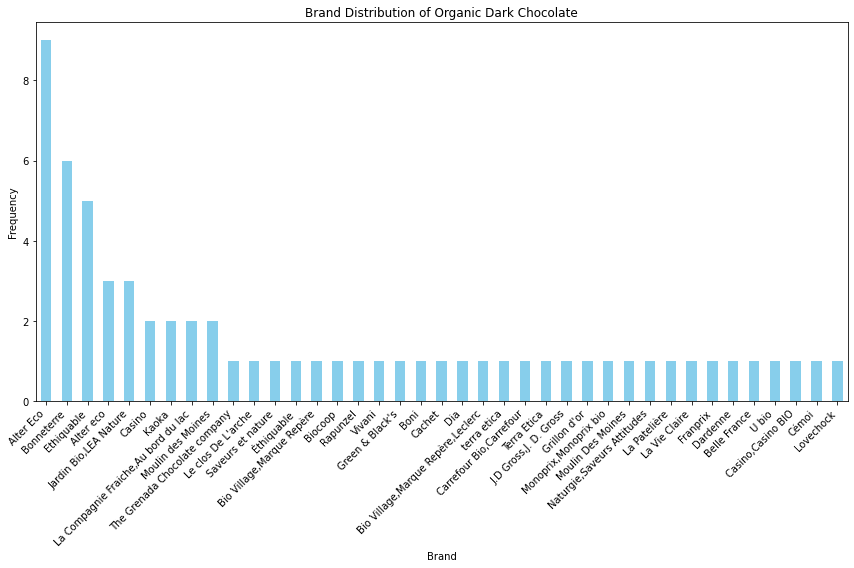

In [24]:
# Filter rows where either product name or ingredients text contains 'organic'
organic_df = df_dark[df_dark['product_name'].str.
                     contains('organic|biologique|biologico|orgánico|ökologisch|orgânico|ekologisk', case=False, na=False) | 
                     df_dark['ingredients_text'].str.
                     contains('organic|biologique|biologico|orgánico|ökologisch|orgânico|ekologisk', case=False, na=False)]

# Count occurrences of each brand
brand_counts = organic_df['brands'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
brand_counts.plot(kind='bar', color='skyblue')
plt.title('Brand Distribution of Organic Dark Chocolate')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
